In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from git import Repo
repo = Repo('.')
print("%s@%s"%(repo.active_branch.abspath, repo.head.commit))

/home/sam/Downloads/avian_vocalizations/.git/refs/heads/master@7adcfe027e1853b111d766ec4efc7f99608ae053


In [3]:
from hyperopt.mongoexp import MongoTrials
from vastai.api import VastClient
import json
from matplotlib import pyplot as plt
import numpy as np
from toolbench.tools import print_module_versions
print_module_versions(globals())

             IPython  {'7.9.0'}
                 git  {'3.0.4'}
            hyperopt  {'0.2.2'}
                json  {'2.0.9'}
          matplotlib  {'3.1.1'}
               numpy  {'1.17.3'}
           toolbench  {'0.0.1'}


In [4]:
vast = VastClient().authenticate()
instance = vast.get_running_instances()[0]
instance.start().wait_until_running()
remote = instance.pb_remote
instance.ssh_connection_command

Initializing vast.ai client with api_key from /home/sam/.vast_api_key.
Starting instance 405882.


'ssh root@ssh5.vast.ai -p 15882 -i /home/sam/.ssh/vastai'

In [5]:
tunnel = instance.get_tunnel(27018, 27017)

In [6]:
trials = MongoTrials('mongo://localhost:27018/avian_vocalizations/jobs', 
                     exp_key='alpha0')
trial = trials.best_trial

In [7]:
def plot_trial(trial):
    result = trial['result']
    scores = result['scores']
    print("Experiment %s, Trial %s ObjectId(%s)"%(
        trial['exp_key'], trial['tid'], trial['_id']))
    print("Mean scores: loss: %f \u207A\u2044\u208B %f,  "
          "accuracy: %.2f\ufe6a\u207A\u2044\u208B %.3f\ufe6a"%(
        result['loss'], result['loss_variance']**.5, 
        100*result['accuracy'], 100*result['accuracy_variance']**.5))
    params = json.loads(trials.trial_attachments(trial)['params'])
    print("Training params: \n%s"%params)
    for i in range(len(scores)):
        print("Split %i scores:\n%s"%(i, dict(scores[i])))
        plot_split(i, trial)
        plt.show()
        
def plot_split(i, trial):
    def plot(history, metric, ax=None, title=None, symbol='.', hline=None):
        if ax is None: ax = plt.gca()
        if type(metric) is str: metric = [ metric ]
        for m in metric:
            arr = np.array(history[m])
            masked = np.ma.masked_where( (arr>9999) | (arr<-9999), arr )
            ax.plot(masked, symbol, label=metric)
            if title: ax.set_title(title)
            ax.set_xlabel('epoch')
            ax.vlines(scores['argmin_loss'], *ax.get_ylim(), colors='m')
            if hline is not None:
                ax.hlines(hline, *ax.get_xlim(), colors='m')
        
        
    scores=trial['result']['scores'][i]
    accuracy = scores['accuracy']
    history=json.loads(trials.trial_attachments(trial)['metrics.split%i'%i])
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(11,3))
    plt.tight_layout()
    plt.rcParams['lines.linewidth']=1
    
    plot(history, ['accuracy', 'val_accuracy'], ax0, 
         title="Split %i Accuracy"%i,
         hline=scores['accuracy'])

    plot(history, ['loss','val_loss'], ax1, 
         title="Split %i Loss"%i, 
         hline=scores['loss'])
    
    fig.show()

In [8]:
# plot_trial(trials.best_trial)

Experiment alpha0, Trial 84 ObjectId(5dc21b7b14e92da42e94e5ae)
Mean scores: loss: 3.326385 ⁺⁄₋ 0.168239,  accuracy: 16.50﹪⁺⁄₋ 2.051﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.03610653836571337, 'batch_size': 64}
Split 0 scores:
{'loss': 3.1581454277038574, 'accuracy': 0.185546875, 'argmin_loss': 51}


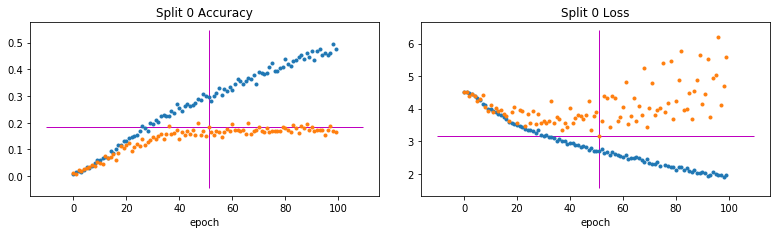

Split 1 scores:
{'loss': 3.494623899459839, 'accuracy': 0.14453125, 'argmin_loss': 45}


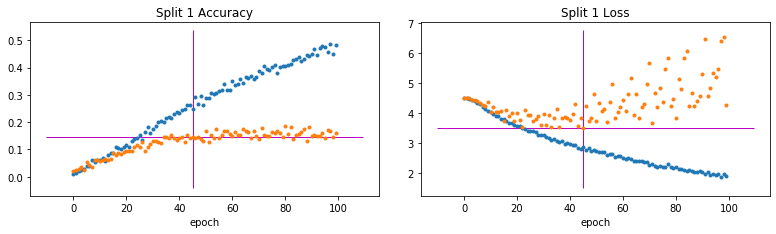

Experiment alpha0, Trial 87 ObjectId(5dc220c614e92da42e94e5b4)
Mean scores: loss: 3.418378 ⁺⁄₋ 0.029048,  accuracy: 11.04﹪⁺⁄₋ 1.074﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.38588340195124093, 'batch_size': 64}
Split 0 scores:
{'loss': 3.447425365447998, 'accuracy': 0.099609375, 'argmin_loss': 97}


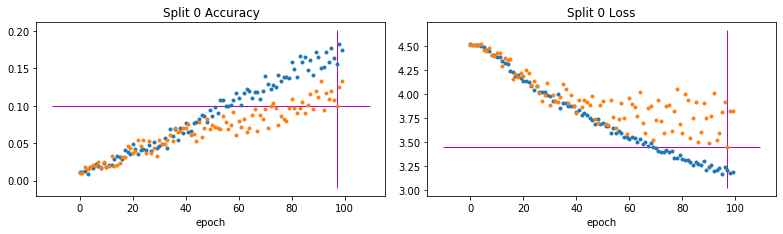

Split 1 scores:
{'loss': 3.3893299102783203, 'accuracy': 0.12109375, 'argmin_loss': 75}


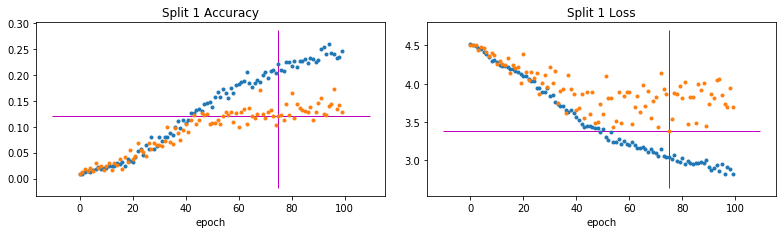

Experiment alpha0, Trial 90 ObjectId(5dc227b114e92da42e94e5b7)
Mean scores: loss: 3.462553 ⁺⁄₋ 0.093285,  accuracy: 13.67﹪⁺⁄₋ 1.758﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.02568632069114818, 'batch_size': 64}
Split 0 scores:
{'loss': 3.3692684173583984, 'accuracy': 0.154296875, 'argmin_loss': 39}


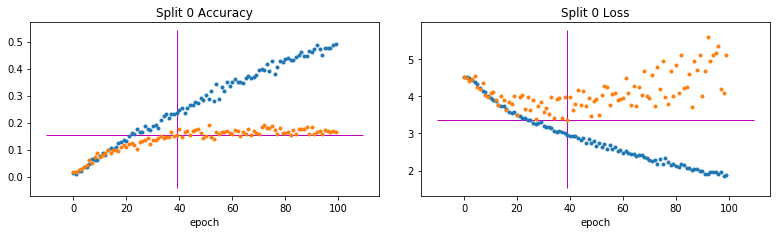

Split 1 scores:
{'loss': 3.5558383464813232, 'accuracy': 0.119140625, 'argmin_loss': 45}


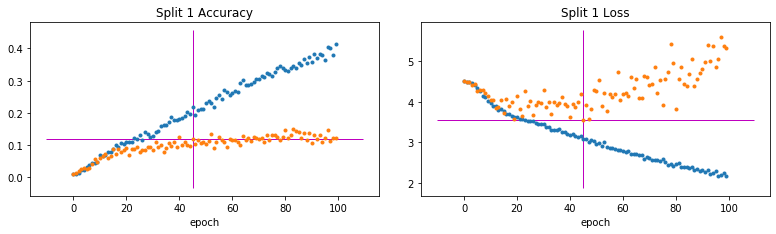

Experiment alpha0, Trial 86 ObjectId(5dc21e7814e92da42e94e5b3)
Mean scores: loss: 3.466500 ⁺⁄₋ 0.118331,  accuracy: 11.82﹪⁺⁄₋ 2.051﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.26919412082349015, 'batch_size': 64}
Split 0 scores:
{'loss': 3.584831476211548, 'accuracy': 0.09765625, 'argmin_loss': 97}


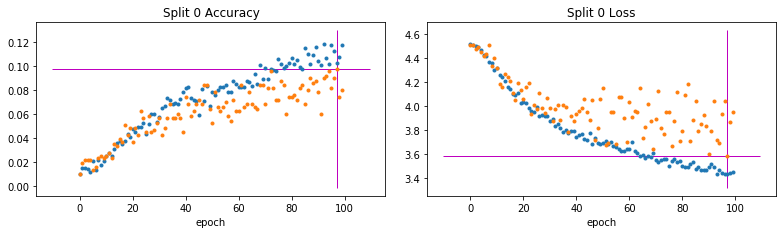

Split 1 scores:
{'loss': 3.3481688499450684, 'accuracy': 0.138671875, 'argmin_loss': 75}


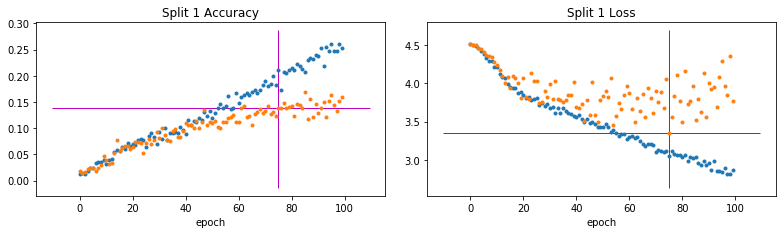

Experiment alpha0, Trial 85 ObjectId(5dc21e7614e92da42e94e5b2)
Mean scores: loss: 3.522214 ⁺⁄₋ 0.060847,  accuracy: 13.09﹪⁺⁄₋ 1.758﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.08878036204078033, 'batch_size': 64}
Split 0 scores:
{'loss': 3.583061456680298, 'accuracy': 0.11328125, 'argmin_loss': 93}


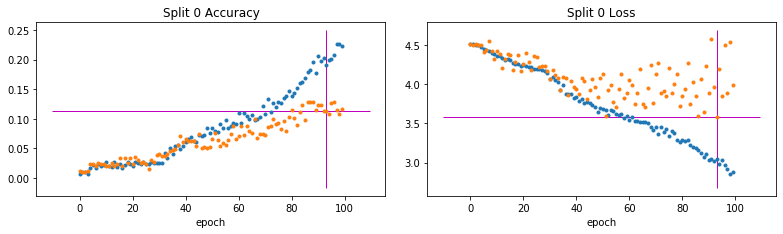

Split 1 scores:
{'loss': 3.461367130279541, 'accuracy': 0.1484375, 'argmin_loss': 45}


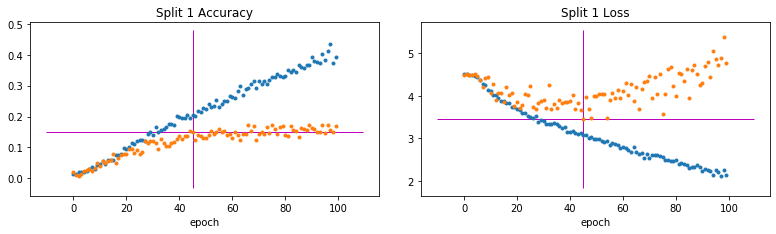

Experiment alpha0, Trial 92 ObjectId(5dc24b7414e92da42e94e5b9)
Mean scores: loss: 3.630399 ⁺⁄₋ 0.068221,  accuracy: 8.50﹪⁺⁄₋ 0.098﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.16206145034077152, 'batch_size': 64}
Split 0 scores:
{'loss': 3.562178373336792, 'accuracy': 0.0859375, 'argmin_loss': 51}


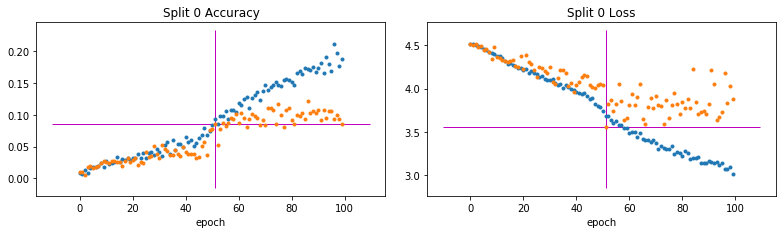

Split 1 scores:
{'loss': 3.698619842529297, 'accuracy': 0.083984375, 'argmin_loss': 54}


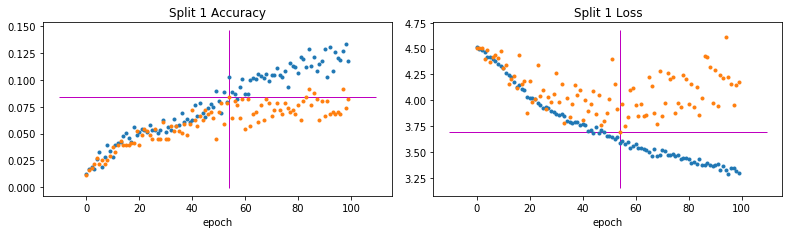

Experiment alpha0, Trial 89 ObjectId(5dc2255414e92da42e94e5b6)
Mean scores: loss: 3.631459 ⁺⁄₋ 0.330060,  accuracy: 8.79﹪⁺⁄₋ 6.250﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.35057113443265303, 'batch_size': 64}
Split 0 scores:
{'loss': 3.961519241333008, 'accuracy': 0.025390625, 'argmin_loss': 89}


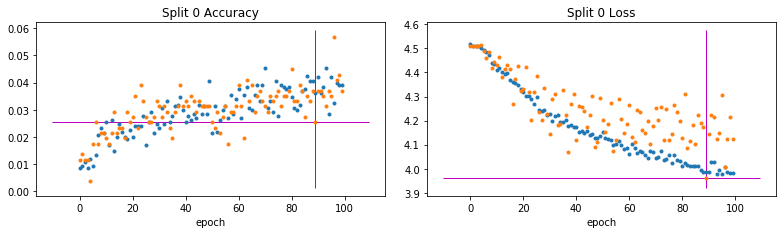

Split 1 scores:
{'loss': 3.301398992538452, 'accuracy': 0.150390625, 'argmin_loss': 75}


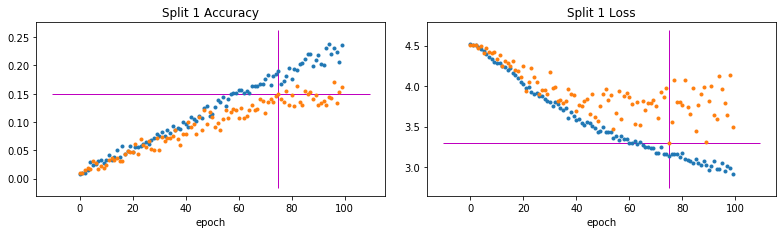

Experiment alpha0, Trial 88 ObjectId(5dc2230c14e92da42e94e5b5)
Mean scores: loss: 3.784909 ⁺⁄₋ 0.263536,  accuracy: 6.54﹪⁺⁄₋ 3.613﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.37339408549073716, 'batch_size': 64}
Split 0 scores:
{'loss': 3.5213723182678223, 'accuracy': 0.1015625, 'argmin_loss': 69}


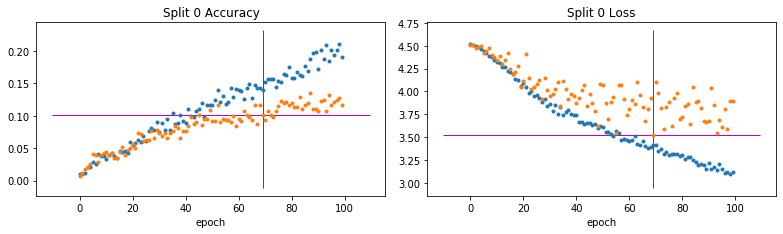

Split 1 scores:
{'loss': 4.048445224761963, 'accuracy': 0.029296875, 'argmin_loss': 68}


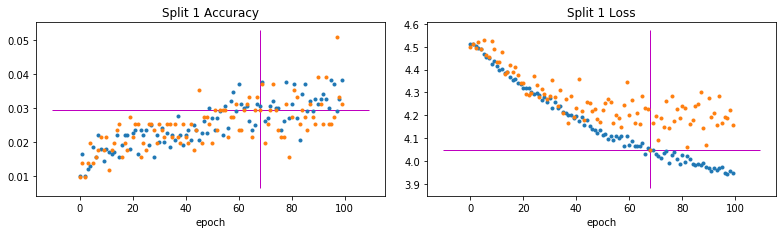

Experiment alpha0, Trial 91 ObjectId(5dc2493814e92da42e94e5b8)
Mean scores: loss: 3.937968 ⁺⁄₋ 0.571354,  accuracy: 7.52﹪⁺⁄₋ 6.152﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.2819054851653348, 'batch_size': 64}
Split 0 scores:
{'loss': 3.36661434173584, 'accuracy': 0.13671875, 'argmin_loss': 90}


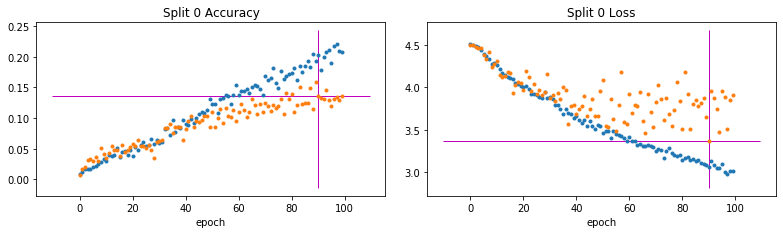

Split 1 scores:
{'loss': 4.509322166442871, 'accuracy': 0.013671875, 'argmin_loss': 0}


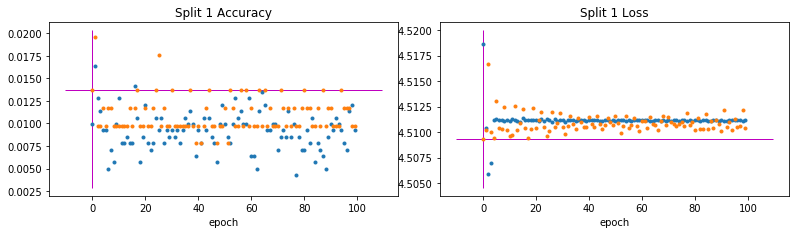

Experiment alpha0, Trial 93 ObjectId(5dc24daf14e92da42e94e5ba)
Mean scores: loss: 4.195468 ⁺⁄₋ 0.314405,  accuracy: 3.42﹪⁺⁄₋ 2.051﹪
Training params: 
{'n_frames': 128, 'dropout_rate': 0.4726404762959162, 'batch_size': 64}
Split 0 scores:
{'loss': 4.509873390197754, 'accuracy': 0.013671875, 'argmin_loss': 7}


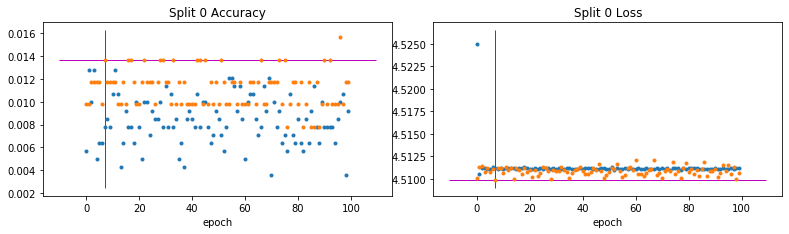

Split 1 scores:
{'loss': 3.881063461303711, 'accuracy': 0.0546875, 'argmin_loss': 89}


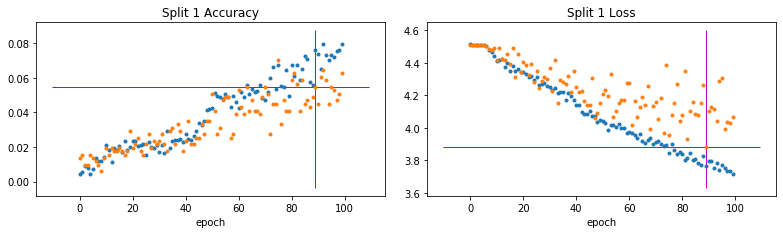

In [9]:
for trial in sorted(trials.trials, 
                    key=lambda x: x['result']['loss'], 
                    reverse=False):
    plot_trial(trial)

In [10]:
# trials.delete_all()

## Cleanup

In [11]:
tunnel.close()

In [12]:
# instance.stop()